In [2]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import re
import string
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load spaCy model for lemmatization
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])


In [3]:
# 2. Load Dataset
df = pd.read_csv("/content/data_to_be_cleansed.csv")  # Replace with your actual path

# Drop unnecessary index column if present
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

df.head()


,text,title,target
0,Welcome to /r/depression's check-in post - a p...,"Regular check-in post, with information about ...",1
1,We understand that most people who reply immed...,Our most-broken and least-understood rules is ...,1
2,Anyone else just miss physical touch? I crave ...,"I haven’t been touched, or even hugged, in so ...",1
3,I’m just so ashamed. Everyone and everything f...,Being Depressed is Embarrassing,1
4,I really need a friend. I don't even have a si...,I'm desperate for a friend and to feel loved b...,1


In [29]:
print("Shape:", df.shape)
df.info()
df['target'].value_counts()


Shape: (5957, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5957 entries, 0 to 5956
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           5607 non-null   object
 1   title          5957 non-null   object
 2   target         5957 non-null   int64 
 3   text_combined  5957 non-null   object
 4   clean_text     5957 non-null   object
 5   label          5957 non-null   object
dtypes: int64(1), object(5)
memory usage: 279.4+ KB


,count
target,
1,1202
3,1201
4,1188
2,1185
0,1181


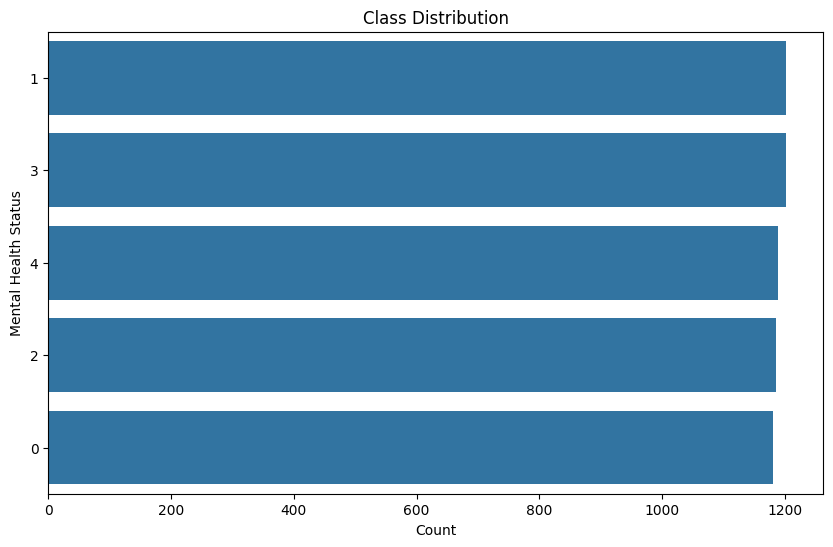

In [33]:
#  Visualize Class Distribution
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='target', order=df['target'].value_counts().index)
plt.title("Class Distribution")
plt.xlabel("Count")
plt.ylabel("Mental Health Status")
plt.show()

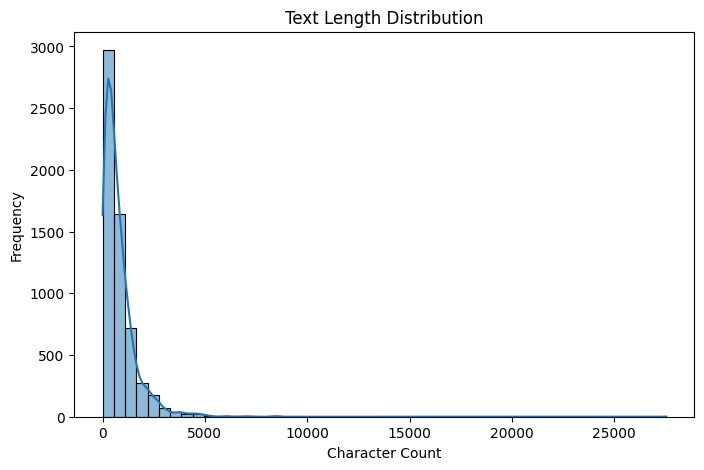

In [32]:
# Text Length Distribution
df['text_len'] = df['text'].astype(str).apply(len)
plt.figure(figsize=(8,5))
sns.histplot(df['text_len'], bins=50, kde=True)
plt.title("Text Length Distribution")
plt.xlabel("Character Count")
plt.ylabel("Frequency")
plt.show()

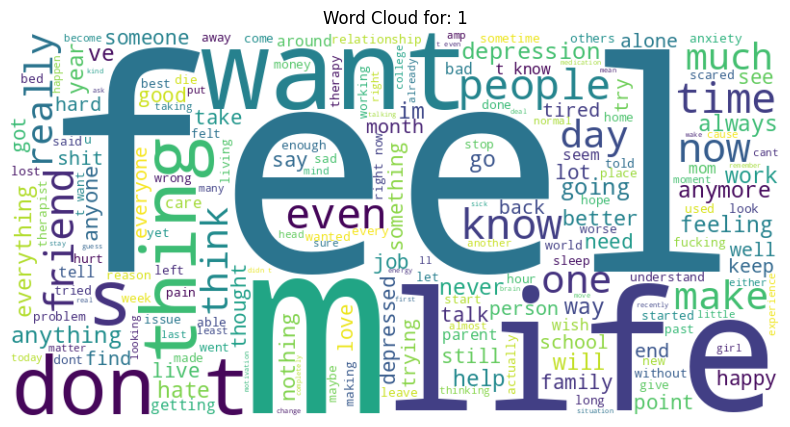

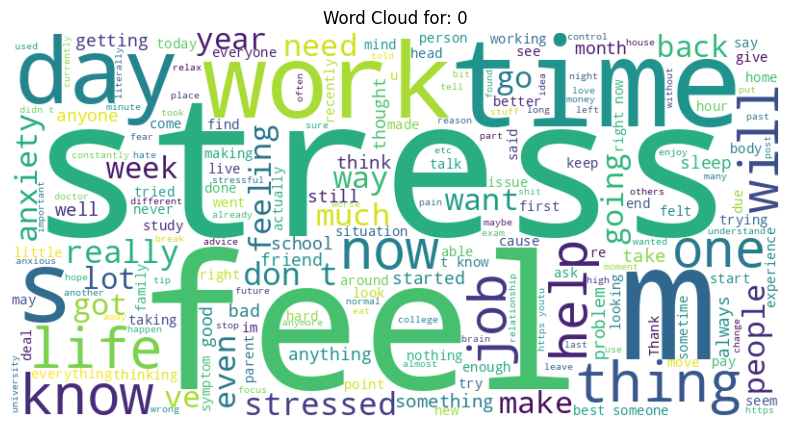

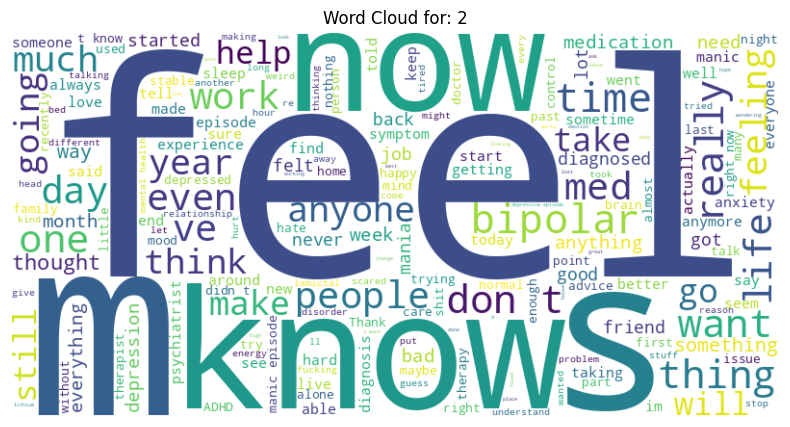

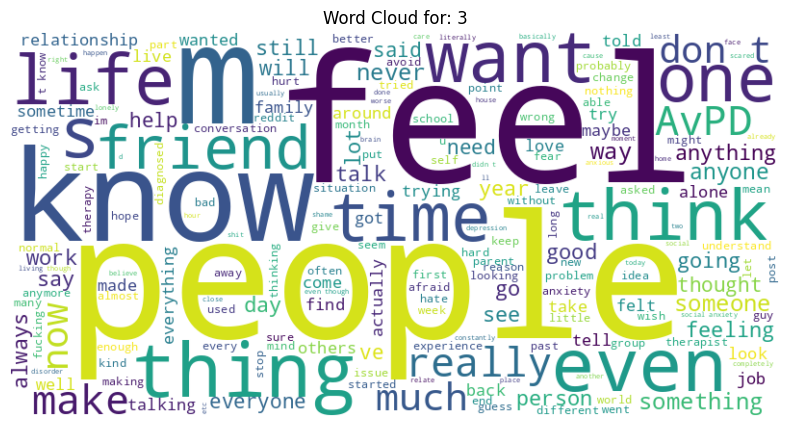

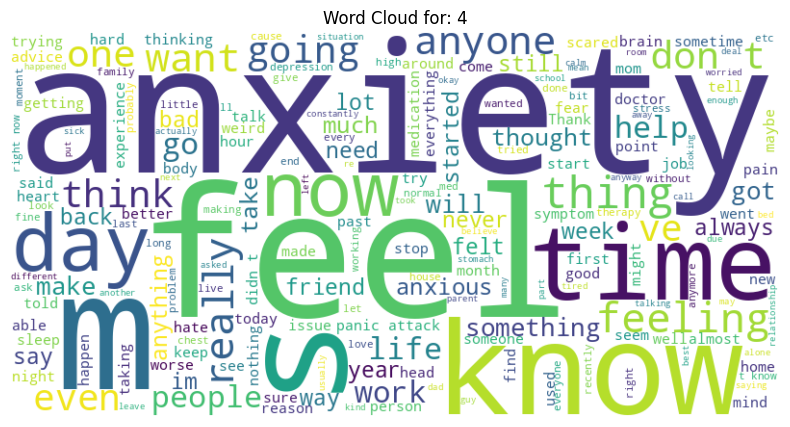

In [35]:
#Word Clouds per Class
from wordcloud import WordCloud
for label in df['target'].unique():
    text = " ".join(df[df['target'] == label]['text'].dropna().astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for: {label}")
    plt.show()

In [4]:
# 3. Optional: Combine title + text
df['text_combined'] = df['title'].fillna('') + ' ' + df['text'].fillna('')

# Optional preview
df[['text_combined', 'target']].head()


,text_combined,target
0,"Regular check-in post, with information about ...",1
1,Our most-broken and least-understood rules is ...,1
2,"I haven’t been touched, or even hugged, in so ...",1
3,Being Depressed is Embarrassing I’m just so as...,1
4,I'm desperate for a friend and to feel loved b...,1


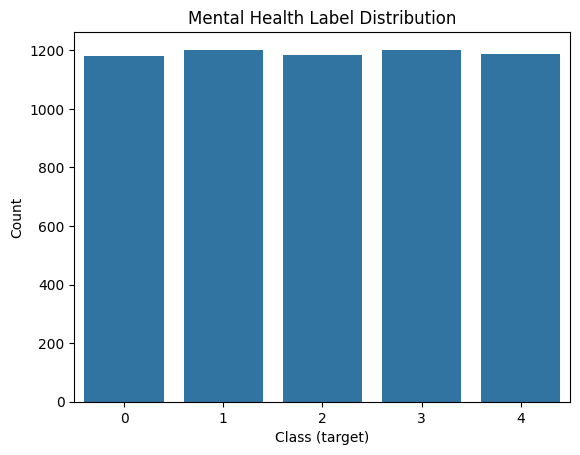


Label 0 sample:
Free Covid-19 Anxiety e-Workbook. Please, take care of yourselves and of each other. See text for link. The book is available [Here](https://thewellnesssociety.org/free-coronavirus-anxiety-workbook/) from The Wellness Society. Everyone right now needs a little extra help and hopefully, this e-book can assist some of you in uncovering the toolset you need during this abnormal time, or at least it might help with bridging the gap between now and when you may be able to seek more professional assistance. Obviously, it's not a solution to all problems, and some of you are going to be going through a lot more than others, but I hope many of you can find it useful.
Stay safe, stay healthy.

Label 1 sample:
Regular check-in post, with information about our rules and wikis Welcome to /r/depression's check-in post - a place to take a moment and share what is going on and how you are doing. If you have an accomplishment you want to talk about (these shouldn't be standalone posts

In [5]:
# 4. Basic Target Analysis
sns.countplot(data=df, x='target')
plt.title("Mental Health Label Distribution")
plt.xlabel("Class (target)")
plt.ylabel("Count")
plt.show()

# Optional: Inspect some samples per class
for label in sorted(df['target'].unique()):
    print(f"\nLabel {label} sample:")
    print(df[df['target'] == label]['text_combined'].iloc[0])


In [6]:
# Before applying text cleaning
df['text_combined'] = df['title'].fillna('') + ' ' + df['text'].fillna('')
df['text_combined'] = df['text_combined'].astype(str)  # Ensure it's string


5. Clean Text Function

In [7]:
def clean_text(text):
    try:
        # Ensure string input
        text = str(text).lower()
        text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
        text = text.translate(str.maketrans('', '', string.punctuation))
        text = re.sub(r'\d+', '', text)
        return text
    except Exception as e:
        print("Error cleaning text:", text)
        return ""


6. Tokenization + Lemmatization with spaCy

In [8]:
def lemmatize_text(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc if not token.is_stop and token.is_alpha])

# Apply both steps
df['clean_text'] = df['text_combined'].apply(lambda x: clean_text(x))
df['clean_text'] = df['clean_text'].apply(lambda x: lemmatize_text(x))

df[['clean_text', 'target']].head()


,clean_text,target
0,regular checkin post information rule wikis we...,1
1,mostbroken leastunderstood rule helper invite ...,1
2,touch hug long remember feel like miss physica...,1
3,depressed embarrass ashamed feel far away time...,1
4,m desperate friend feel love need friend not s...,1


In [9]:
# Show how many unique classes we have
print("Unique labels:", df['target'].unique())
print("\nValue counts:")
print(df['target'].value_counts())

# Show a few example texts per label
for label in sorted(df['target'].unique()):
    print(f"\nLabel {label} Sample:")
    print(df[df['target'] == label]['text_combined'].iloc[0])


Unique labels: [1 0 2 3 4]

Value counts:
target
1    1202
3    1201
4    1188
2    1185
0    1181
Name: count, dtype: int64

Label 0 Sample:
Free Covid-19 Anxiety e-Workbook. Please, take care of yourselves and of each other. See text for link. The book is available [Here](https://thewellnesssociety.org/free-coronavirus-anxiety-workbook/) from The Wellness Society. Everyone right now needs a little extra help and hopefully, this e-book can assist some of you in uncovering the toolset you need during this abnormal time, or at least it might help with bridging the gap between now and when you may be able to seek more professional assistance. Obviously, it's not a solution to all problems, and some of you are going to be going through a lot more than others, but I hope many of you can find it useful.
Stay safe, stay healthy.

Label 1 Sample:
Regular check-in post, with information about our rules and wikis Welcome to /r/depression's check-in post - a place to take a moment and share what

In [10]:
label_mapping = {
    0: 'Normal',
    1: 'Depression',
    2: 'Suicidal',
    3: 'Anxiety',
    4: 'Stress'
}


In [11]:
df['label'] = df['target'].map(label_mapping)
df[['clean_text', 'label']].head()


,clean_text,label
0,regular checkin post information rule wikis we...,Depression
1,mostbroken leastunderstood rule helper invite ...,Depression
2,touch hug long remember feel like miss physica...,Depression
3,depressed embarrass ashamed feel far away time...,Depression
4,m desperate friend feel love need friend not s...,Depression


In [12]:
# Save preprocessed dataset for future use
df[['clean_text', 'target']].to_csv("your_preprocessed_dataset4.csv", index=False)


7. Train-Test Split

In [13]:
X = df['clean_text']
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

print(f"Train size: {len(X_train)}")
print(f"Test size: {len(X_test)}")

Train size: 4765
Test size: 1192


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
tfidf = TfidfVectorizer(max_features=5000)  # Can tune features

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(f"TF-IDF shape: {X_train_tfidf.shape}")


TF-IDF shape: (4765, 5000)


In [16]:
def evaluate_model(model, X_train, y_train, X_test, y_test, name="Model"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, preds, digits=4))

    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()



Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0     0.8658    0.8475    0.8565       236
           1     0.7288    0.7137    0.7212       241
           2     0.8692    0.7848    0.8248       237
           3     0.7395    0.8042    0.7705       240
           4     0.7840    0.8235    0.8033       238

    accuracy                         0.7945      1192
   macro avg     0.7974    0.7947    0.7953      1192
weighted avg     0.7970    0.7945    0.7949      1192



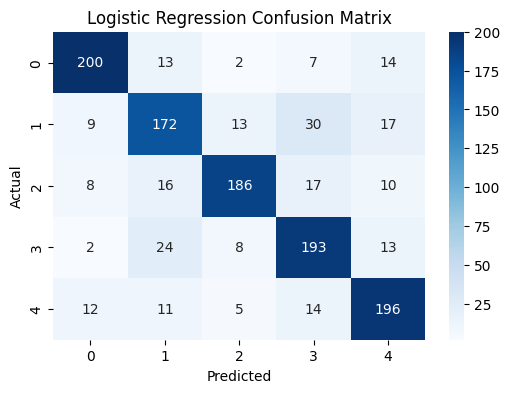

In [17]:
lr = LogisticRegression(max_iter=1000)
evaluate_model(lr, X_train_tfidf, y_train, X_test_tfidf, y_test, name="Logistic Regression")



SVM Classification Report:

              precision    recall  f1-score   support

           0     0.8245    0.8559    0.8399       236
           1     0.7331    0.7178    0.7254       241
           2     0.8610    0.8101    0.8348       237
           3     0.7220    0.7792    0.7495       240
           4     0.8079    0.7773    0.7923       238

    accuracy                         0.7878      1192
   macro avg     0.7897    0.7881    0.7884      1192
weighted avg     0.7893    0.7878    0.7880      1192



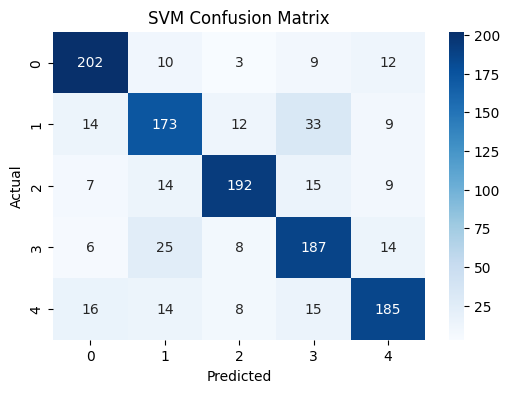

In [18]:
svm = SVC(kernel='linear')  # Or 'rbf'
evaluate_model(svm, X_train_tfidf, y_train, X_test_tfidf, y_test, name="SVM")



Random Forest Classification Report:

              precision    recall  f1-score   support

           0     0.8560    0.8814    0.8685       236
           1     0.7348    0.8506    0.7885       241
           2     0.9346    0.8439    0.8869       237
           3     0.8017    0.7750    0.7881       240
           4     0.8527    0.8025    0.8268       238

    accuracy                         0.8305      1192
   macro avg     0.8359    0.8307    0.8318      1192
weighted avg     0.8355    0.8305    0.8315      1192



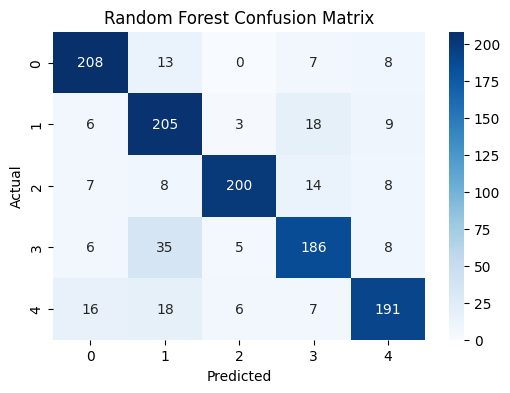

In [19]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(rf, X_train_tfidf, y_train, X_test_tfidf, y_test, name="Random Forest")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:58:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Classification Report:

              precision    recall  f1-score   support

           0     0.8650    0.8686    0.8668       236
           1     0.7598    0.8008    0.7798       241
           2     0.9116    0.8270    0.8673       237
           3     0.7572    0.7667    0.7619       240
           4     0.8066    0.8235    0.8150       238

    accuracy                         0.8171      1192
   macro avg     0.8200    0.8173    0.8181      1192
weighted avg     0.8196    0.8171    0.8178      1192



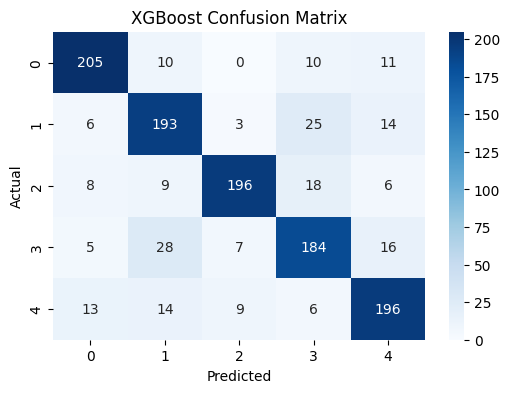

In [20]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
evaluate_model(xgb, X_train_tfidf, y_train, X_test_tfidf, y_test, name="XGBoost")


In [25]:
import joblib

joblib.dump(lr, "best_model.pkl")  # Or replace with best-performing model
joblib.dump(tfidf, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']

In [63]:
import joblib

# Save model + vectorizer + label mapping
joblib.dump(tfidf, "tfidf_vectorizer.pkl")
joblib.dump(svm, "svm_model.pkl")
joblib.dump({0: 'Normal', 1: 'Depression', 2: 'Suicidal', 3: 'Anxiety', 4: 'Stress'}, "label_mapping.pkl")

# Download files
from google.colab import files
files.download("tfidf_vectorizer.pkl")
files.download("svm_model.pkl")
files.download("label_mapping.pkl")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
import joblib
from google.colab import files
joblib.dump(rf, "rf.pkl")
files.download("rf.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>